In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1 style = "fontsize:400%;text-align:center;">QBUS3850: Time Series and Forecasting</h1>
<h2 style = "fontsize:300%;text-align:center;">ARIMA: Model Selection and Seasonal ARIMA</h2>
<h3 style = "fontsize:200%;text-align:center;">Lecture Notes</h3>

<h2 style = "fontsize:300%;text-align:center;">Estimation</h2>

# Conditional Sum of Squares

- A straightforward way to estimate ARMA models is via least squares. For an ARMA(1,1)

$$\underset{\phi,\theta}{\min}\sum_{t=1}^T\left(y_t-c-\phi_1 y_{t-1}-\theta\epsilon_{t-1}\right)^2$$

- Need to condition on initial values

- Need to find a way to update all $\epsilon$

# Initial values

- There are many options but a common one is to condition on the first $p$ observed values of $y$ and set any $\epsilon$ that need to be conditioned on to zero.
- For an ARMA(1,1) condition on $y_1$ and set $\epsilon_1=0$. Then use observations $t=2,\dots,T$ in the sums of squares.

$$\underset{\phi,\theta}{\min}\sum_{t=2}^T\left(y_t-c-\phi_1 y_{t-1}-\theta\epsilon_{t-1}\right)^2$$

- Other options include setting $y_0=0$ or setting $y_0=E(Y_0)$ and using all of the data.
- For stationary, invertible process, impact is minimal with enough data.

# Recursion

- Use the following recursion to update the $\epsilon$

$$\begin{aligned}\color{blue}{\epsilon_2}&=y_2-c-\phi y_{1}\\\color{red}{\epsilon_3}&=y_t-c-\phi y_{2}-\theta\color{blue}{\epsilon_2}\\\epsilon_4&=y_t-c-\phi y_{3}-\theta\color{red}{\epsilon_3}\\\vdots&=\vdots\quad\vdots\quad\vdots\end{aligned}$$

- There is no closed form solution for $\theta$ and $\phi$ but they can be found numerically.

# Likelihood

- Maximum likelihood maximises the joint density of the data with respect to the parameters

$$\begin{aligned}\hat{\Theta},\hat{\Phi},\hat\sigma,\hat c=&\underset{\phi,\theta}{\max}f(y_1,y_2,\dots,y_T|\Theta,\Phi,\sigma^2\color{blue}{,y_0,y_{-1},\dots,\epsilon_0, \epsilon_{-1},\dots})\\=&\underset{\phi,\theta}{\max}L(\Theta,\Phi,\sigma^2;y_1,y_2,\dots,y_T\color{blue}{,y_0,y_{-1},\dots,\epsilon_0, \epsilon_{-1},\dots})\\\end{aligned}$$

- Assume $\epsilon_t\sim N(0,\sigma^2)$ for all $t$
- Conditional likelihood (includes parts in <span style="color:blue;">blue</span>) equivalent to conditional sum of squares.
- Unconditional likelihood does not have any of the parts in <span style="color:blue;">blue</span> and requires the Kalman filter.

# Advantages

- Maximum likelihood is
  - A consistent estimator
  - A asymptotically normal
  - Can be used to compute information criteria for model selection
- Assuming normality is a disadvantage, but... 
- ...pseudo maximum likelihood theory establishes robustness to this assumption.

# Information criteria

For a model with $k$ parameters, all IC take the form

$$IC = -2\log L + k\times q$$

- The log likelihood measures the "fit" of the data, with higher values indicating a better fit.
- To avoid overfitting there is a "penalty" on the number of parameters $k$.
- If many ARIMA models are fit by maximum likelihood, information criteria can be computed for each model 
- Choose the model with the **lowest** value of the information criterion.



# AIC, AICc and BIC

- If $q=2$ we have the **AIC**. Theoretically the AIC will choose a model closest to the true data generating process (DGP), even if the true DGP is not one of the models estimated.
- If $q=2+\frac{2(k+1)}{n-k-1}$ we have the **AICc**. The AIC relies on asymptotic arguments, the AICc is a correction for finite samples.
- if $q=log(n)$ we have the **BIC**. Theoretically the BIC is model consistent (it will choose the correct model as $n\rightarrow\infty$). However the true DGP must be one of the models under consideration.
- In ARIMA modelling AICc is most commonly used

<h2 style = "fontsize:300%;text-align:center;">Model Selection</h2>

# Auto Arima

- Box-Jenkins approach of looking at ACF and PACF plots popular when computers were slow.
- With improvements in computing it is possible to search through a large number of possible ARIMA models and select the best models using selection criteria.
- One popular such algorithm is *auto arima*, proposed by [Hyndman and Khandakar (2008)](https://doi.org/10.18637/jss.v027.i03) and implemented in R packages.
- For a Python implementation install [statsforecast](https://github.com/Nixtla/statsforecast)

# Auto Arima (find $d$)

- Step 1 is to find the correct level of differencing using a hypothesis test
- By default the KPSS test is used.
  - Null is that data are stationary
  - If fail to reject, $d=0$. If rejected, take differences and apply KPSS test again. 
  - If fail to reject, $d=1$. If rejected a second time, $d=2$.
- Other tests (augmented Dickey-Fuller and Phillips Perron) can be used.
  - The null for these is that data are non-stationary.

# Auto Arima (find $p,q$)

- Fit four models
  - ARIMA(0,d,0)
  - ARIMA(1,d,0)
  - ARIMA(0,d,1)
  - ARIMA(2,d,2)
- Select the model from the above list that minimises AICc

# Auto Arima (find $p,q$)

Using the best current model search "neighbouring models", which are
- Models with AR order different by $\pm 1$.
- Models with MA order different by $\pm 1$.
- Models that include/exclude an intercept

<img src="ARMAgridsearch.png" alt="hk" width="600"/>

Source: [FPP3](https://otexts.com/fpp3/arima-r.html)

# Application

- Forecast turnover in restaurant/cafe takeway sector in NSW

In [2]:
import pandas as pd
dat = pd.read_csv('takeaway.csv')
dat['Month']=pd.to_datetime(dat['Month'])
print(dat)

         Month  Turnover
0   1982-04-01      85.4
1   1982-05-01      84.8
2   1982-06-01      80.7
3   1982-07-01      82.4
4   1982-08-01      80.7
..         ...       ...
436 2018-08-01     579.2
437 2018-09-01     569.2
438 2018-10-01     588.6
439 2018-11-01     576.0
440 2018-12-01     630.3

[441 rows x 2 columns]


# Application

- Time series plot

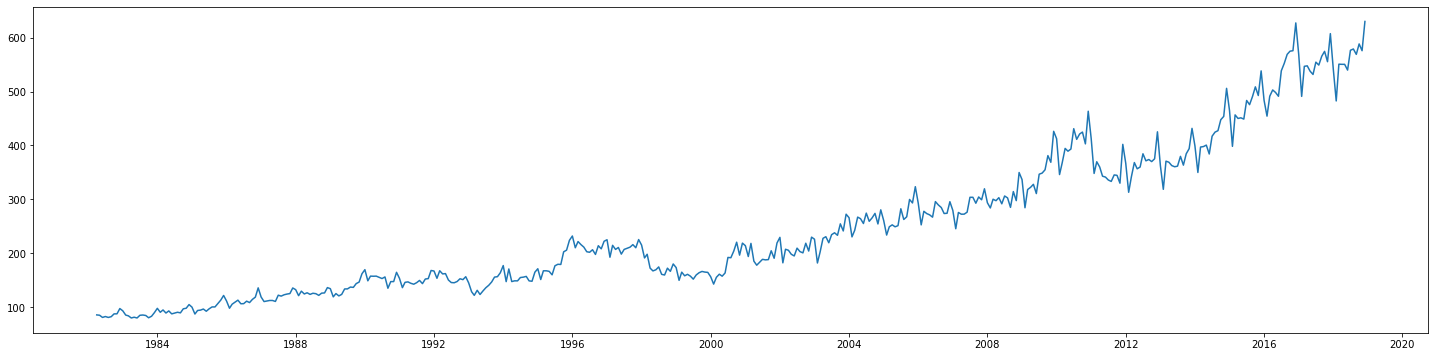

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(dat.Month, dat.Turnover)

# Transformation

- Best to stabilise variance using log transformation
- There is a certain structure to the pandas data frame that works well with the package.

In [4]:
import numpy as np
dat['logTurnover'] = np.log(dat['Turnover'])
train = pd.DataFrame(
    {
        'ds': np.arange(1, len(dat) + 1),
        'y': dat['logTurnover'].to_numpy()
    },
    index=pd.Index([0] * len(dat), name='unique_id')
)

# Using auto_arima

Can generate forecasts using auto_arima function.

In [5]:
from statsforecast import StatsForecast
from statsforecast.models import auto_arima
fcst = StatsForecast(
    train, 
    models=[(auto_arima,1)], 
    freq='M', 
    n_jobs=1
)
forecasts = fcst.forecast(24)
print(forecasts.head())

2022-03-03 10:13:20 statsforecast.core INFO: Computing forecasts
2022-03-03 10:13:30 statsforecast.core INFO: Computed forecasts for auto_arima.


            ds  auto_arima
unique_id                 
0          442    6.421310
0          443    6.400651
0          444    6.420686
0          445    6.409296
0          446    6.414284


# Plot of forecast

<AxesSubplot:xlabel='ds'>

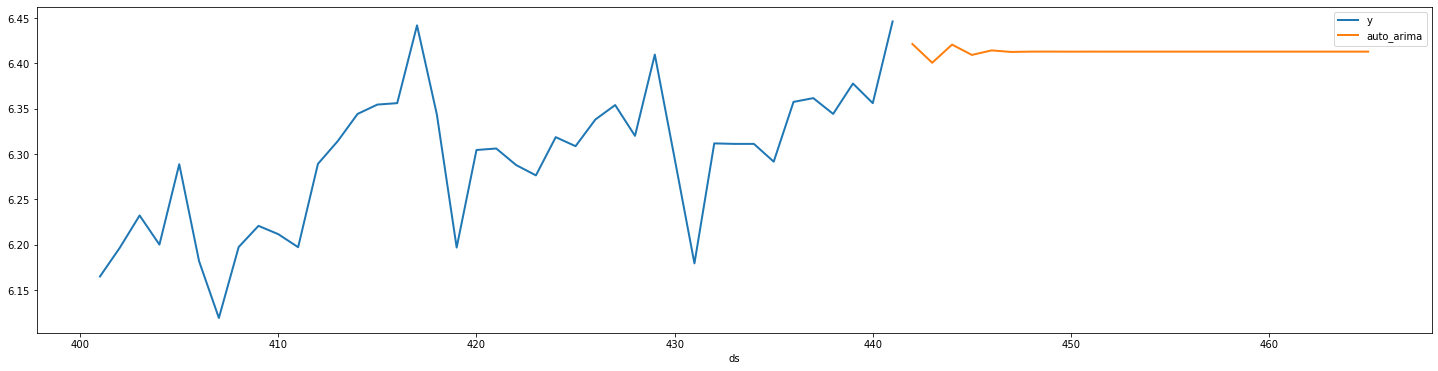

In [6]:
fig, ax = plt.subplots(1, figsize = (25, 6))
pd.concat([train[400:], forecasts]).set_index('ds').plot(ax=ax, linewidth=2)

# Output

- The package is designed to work with many time series.
  - If there are many series to forecast, then usually one does not inspect each individual model.
  - However this can be done with the code below 
  - The first two numbers are $p$ and $q$, sixth number is $d$, other numbers relate to seasonal ARIMA

In [7]:
from statsforecast.arima import auto_arima_f
out = auto_arima_f(train['y'].to_numpy())
print(out['arma'])

(1, 2, 0, 0, 1, 1, 0)


<h2 style = "fontsize:300%;text-align:center;">Seasonal ARIMA</h2>

# Seasonality

- The ARIMA models as we have studied them so far do not take into account seasonality.
- The forecasts are fine for short horizons, but at longer horizons fail to mimic the seasonal pattern.
- This can also be seen by looking at ACF and PACF plots
- Let's consider the ACF and PACF for the difference of log Turnover

# ACF and PACF

Notice the spikes at 12 and 24

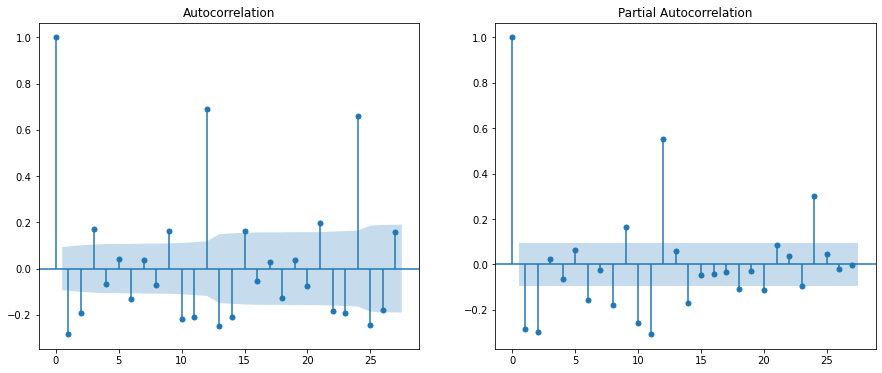

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2,figsize=(15,6))
dify = train.diff()['y'].to_numpy()[2:]
plot_acf(dify,ax=ax[0])
plot_pacf(dify,ax=ax[1])
plt.show()

# Pure Seasonal models

- Seasonal AR(1): $Y_t=\phi^{(s)} Y_{t-m}+\epsilon_t$
- Seasonal AR(2): $Y_t=\phi_1^{(s)} Y_{t-m}+\phi_2^{(s)} Y_{t-2m}+\epsilon_t$
- Seasonal AR(p): $(1-\Phi^{(s)}(L^m))Y_t=\epsilon_t$
- Seasonal ARIMA(p,d,q): $(1-\Phi^{(s)}(L^m))(1-L^m)^DY_t=(1+\Theta^{(s)}(L^m))\epsilon_t$


# Seasonal ARIMA

The most general form for seasonal ARIMA is

$$(1-\Phi(L))(1-\Phi^{(s)}(L^m))(1-L)^d(1-L^m)^DY_t=(1+\Theta(L))(1+\Theta^{(s)}(L^m))\epsilon_t$$

- Note that seasonal difference/components are always applied before non-seasonal components.

- The auto arima algorithm can be generalised to seasonal ARIMA

# Auto arima (seasonal)

Specify the seasonal period together with auto_arima

In [9]:
fcst = StatsForecast(
    train, 
    models=[(auto_arima,1),(auto_arima,12)], 
    freq='M', 
    n_jobs=1
)
forecasts = fcst.forecast(24)


2022-03-03 10:13:35 statsforecast.core INFO: Computing forecasts
2022-03-03 10:13:35 statsforecast.core INFO: Computed forecasts for auto_arima.
2022-03-03 10:13:35 numexpr.utils INFO: NumExpr defaulting to 8 threads.
2022-03-03 10:13:38 statsforecast.core INFO: Computed forecasts for auto_arima_season_length-12.


# Plots

Specify the seasonal period together with auto_arima

<AxesSubplot:xlabel='ds'>

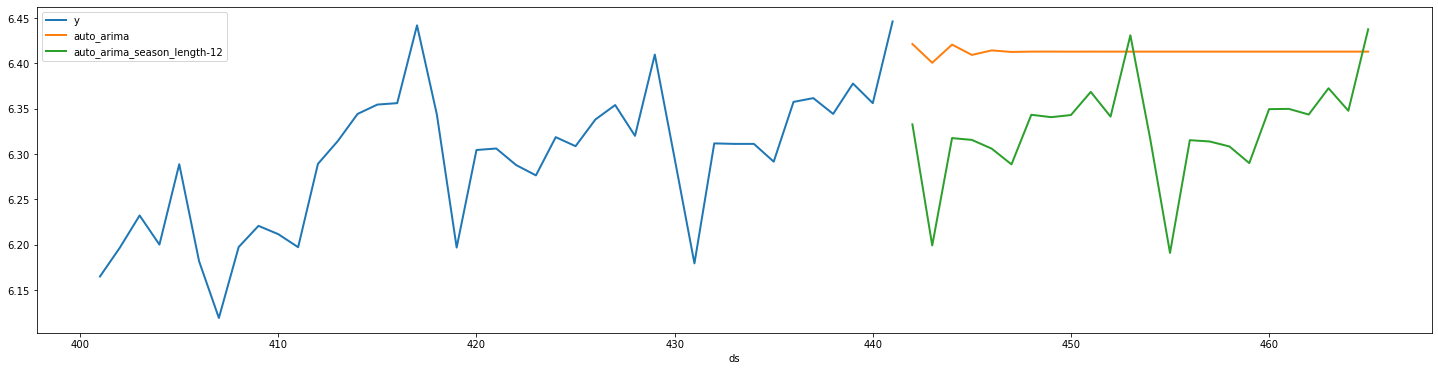

In [10]:
fig, ax = plt.subplots(1, figsize = (25, 6))
pd.concat([train[400:], forecasts]).set_index('ds').plot(ax=ax, linewidth=2)

# Selected model

- The model can be obtained using `auto_arima_f`.
- The first two numbers are the AR and MA order.
- The third and fourth numbers are the Seasonal AR and MA order.
- The fifth number is the period.
- The sixth and seventh number are the degrees of first and seasonal differencing. 

In [11]:
out = auto_arima_f(train['y'].to_numpy(),seasonal=True,period=12)
print(out['arma'])

(2, 2, 0, 1, 12, 0, 1)


<h2 style = "fontsize:300%;text-align:center;">Using covariates</h2>

# Covariates

- An important characteristic of (S)ARIMA models is the ability for them to include covariates or regressors.
- The model becomes
$$(1-\Phi(L))(1-\Phi^{(s)}(L^m))(1-L)^d(1-L^m)^D\color{blue}{(y_t-\mathbf{x}'_t\boldsymbol{\beta})}=(1+\Theta(L))(1+\Theta^{(s)}(L^m))\epsilon_t$$

- This is a regression model with (S)ARIMA ARIMA errors.

# Using covariates

- If the purpose of the analysis is to forecast we can only use regressors that are themselves available when we make the forecast.
- Consider forecasting demand for bike sharing scheme.
- To forecast tomorrow's demand we cannot use tomorrow's weather.
- We can however use dummy variables for the type of day, public holidays, etc.

# Dataset

DC bikeshare data of [Hadi and Gama (2013)](https://link.springer.com/article/10.1007/s13748-013-0040-3)from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike%20sharing%20dataset)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.

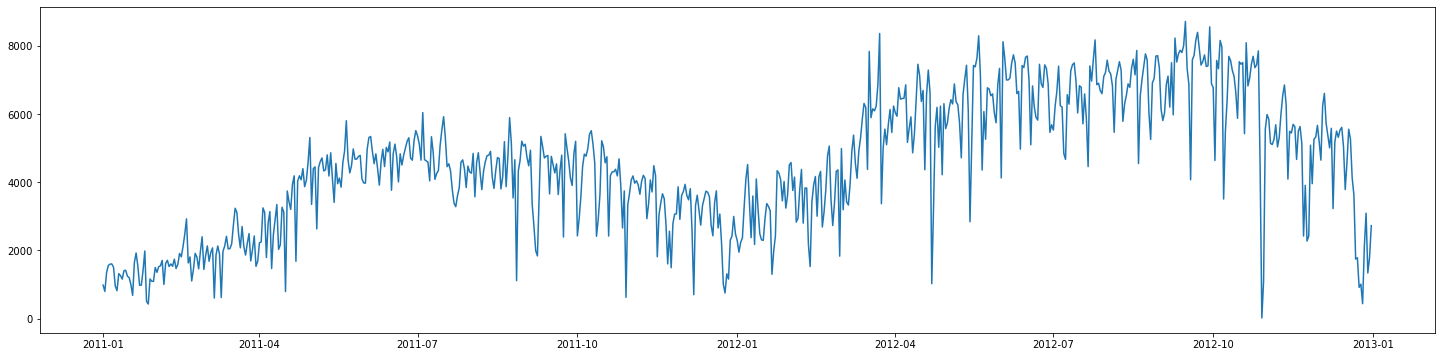

In [12]:
bikes=pd.read_csv('bike_sharing_daily.csv')
bikes['dteday']=pd.to_datetime(bikes['dteday'])
fig, ax = plt.subplots(1, figsize = (25, 6))
ax.plot(bikes['dteday'], bikes['cnt'])
print(bikes)

# Application

- Can handle weekly seasonality by considering seasonal ARIMA models with a period of 7.
- Handle yearly seasonality with month dummies
- Keep holiday dummies
- Convert data into numpy array as input to `auto_arima`

In [13]:
bikes_clean = bikes[['cnt','mnth','holiday']]
bikes_clean = pd.get_dummies(bikes_clean, columns=['mnth'], drop_first=True)
bikes_mat = bikes_clean.to_numpy(dtype='float')
bikes_train=bikes_mat[:640,:]

# Fit and forecast

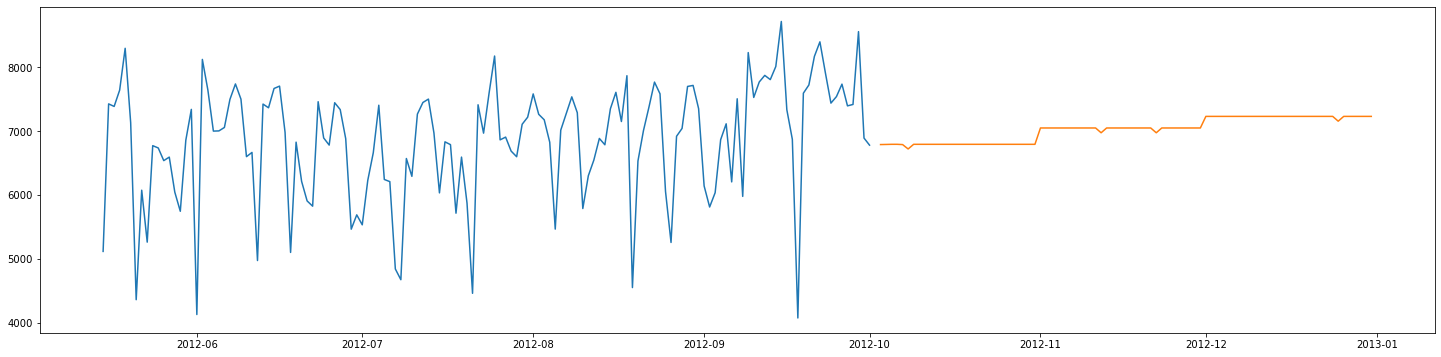

In [14]:
xreg_test = bikes_mat[641:,1:]
fc = auto_arima(bikes_train,91,season_length=7,future_xreg = xreg_test)
fig, ax = plt.subplots(1, figsize = (25, 6))
ax.plot(bikes.iloc[500:640,1], bikes.iloc[500:640,15])
ax.plot(bikes.iloc[641:,1], fc)

# Check model

In [15]:
out = auto_arima_f(bikes_train[:,0],xreg = bikes_train[:,1:],seasonal=True,period=7)
print(out['arma'])

(2, 1, 0, 0, 1, 1, 0)


For this particular dataset no seasonal (weekly) patterns

# Fourier terms

-  An alternative to month dummies is to use Fourier terms. For data with period $m$

$$x_t^{(s)}=\sin\left(\frac{2\pi j t}{m}\right)\quad\textrm{and}\quad x_t^{(c)}=\cos\left(\frac{2\pi j t}{m}\right)\quad \textrm{for}\,j=1,2,\dots,J$$

- Fourier terms can be used to represent any periodic function to an arbitrary degree of accuracy.
- In applied work, as few as 2-3 pairs of Fourier terms can be sufficient.
- This is particularly useful for long seasonalities (e.g. $m=365$).

# Wrap-up

- Modern algorithms for selecting the order of ARIMA models are based on stepwise search, likelihood estimation and the AIC.
- Seasonal ARIMA can capture seasonal effects with a small period.
- Covariates based on calendar effects can be very useful for data based on human behaviour.
- Regression with Fourier terms can capture seasonal effects with a long period. 